In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
rep_csv = pd.read_csv('../../input/20.fa.treatment.profiles', sep='\t')
moa_csv = pd.read_csv('../../input/BBBC021_v1_moa.csv')

unique_moas = moa_csv['moa'].drop_duplicates()
unique_moas.sort_values(inplace=True)

#print rep_csv.columns
#print moa_csv.columns

In [3]:
combined = pd.merge(rep_csv, moa_csv,
                    how='inner',
                    left_on=('Compound',
                             'Concentration'),
                    right_on=('compound', 'concentration'))
print combined.head()

        Compound  Concentration  Factor 1  Factor 2  Factor 3  Factor 4  \
0           AZ-A           30.0 -0.802972  0.423283  2.550399 -0.538550   
1  latrunculin B            1.0 -0.780607  0.280027  2.620715 -0.554497   
2          taxol            3.0 -0.693786  0.306578  2.514005 -0.529753   
3         MG-132            0.1 -0.800311  0.307892  2.512109 -0.625964   
4  cyclohexamide           15.0 -0.695912  0.298432  2.712271 -0.702032   

   Factor 5  Factor 6  Factor 7  Factor 8            ...             \
0  0.299410 -0.754697  0.883240  0.852169            ...              
1  0.262646 -0.675139  0.947646  0.796100            ...              
2  0.219652 -0.570719  0.923862  0.701149            ...              
3  0.441524 -0.618684  0.823247  0.806387            ...              
4  0.352950 -0.708336  0.936830  0.812086            ...              

   Factor 44  Factor 45  Factor 46  Factor 47  Factor 48  Factor 49  \
0  -1.318307   0.526526   0.871724   0.388323   0.5

In [4]:
print combined.iloc[:, 3:-3].head()
combined.iloc[:, 3:-3].shape

   Factor 2  Factor 3  Factor 4  Factor 5  Factor 6  Factor 7  Factor 8  \
0  0.423283  2.550399 -0.538550  0.299410 -0.754697  0.883240  0.852169   
1  0.280027  2.620715 -0.554497  0.262646 -0.675139  0.947646  0.796100   
2  0.306578  2.514005 -0.529753  0.219652 -0.570719  0.923862  0.701149   
3  0.307892  2.512109 -0.625964  0.441524 -0.618684  0.823247  0.806387   
4  0.298432  2.712271 -0.702032  0.352950 -0.708336  0.936830  0.812086   

   Factor 9  Factor 10  Factor 11    ...      Factor 41  Factor 42  Factor 43  \
0  0.917293   0.894751  -0.651495    ...       0.229526   0.429569   0.430836   
1  0.780237   0.935643  -0.627368    ...       0.231329   0.404984   0.200235   
2  0.812606   0.936098  -0.892861    ...       0.098249   0.365500   0.245286   
3  0.840077   0.875341  -0.703464    ...       0.107759   0.324791   0.321830   
4  0.807577   0.910249  -0.726752    ...       0.182293   0.394861   0.167529   

   Factor 44  Factor 45  Factor 46  Factor 47  Factor 48  Fact

(103, 49)

In [5]:
model = TSNE(n_components=2, random_state=0)
reps = model.fit_transform(combined.iloc[:, 3:-3])

In [6]:
print reps.shape

(103, 2)


In [7]:
tsne_reps = pd.DataFrame(columns=['moa', 'x', 'y'])
tsne_reps['moa'] = combined['moa']
tsne_reps[['x', 'y']] = reps

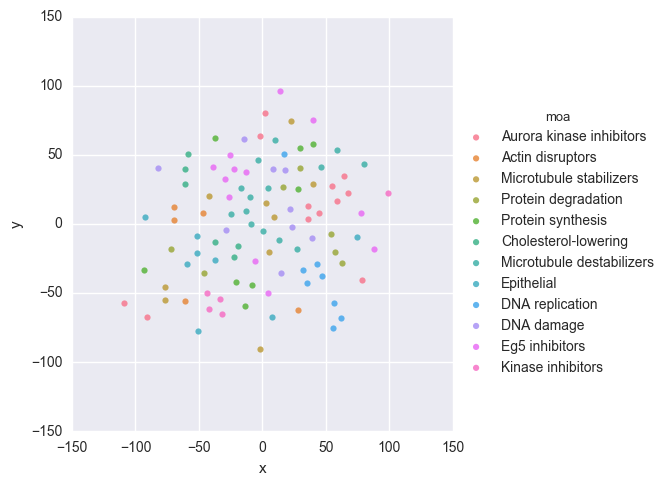

In [8]:
sns.lmplot(x="x", y="y", hue="moa", data=tsne_reps,
           fit_reg=False, legend_out=True, legend=True)
plt.show()

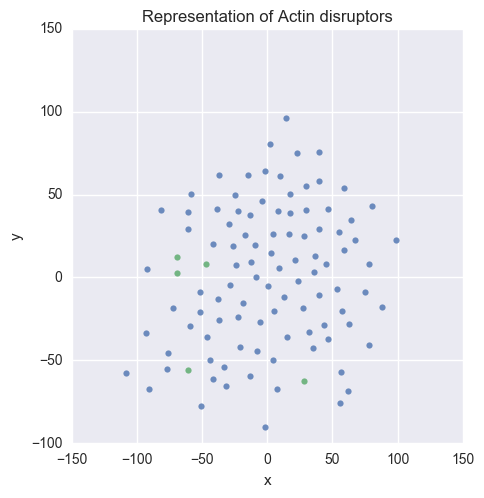

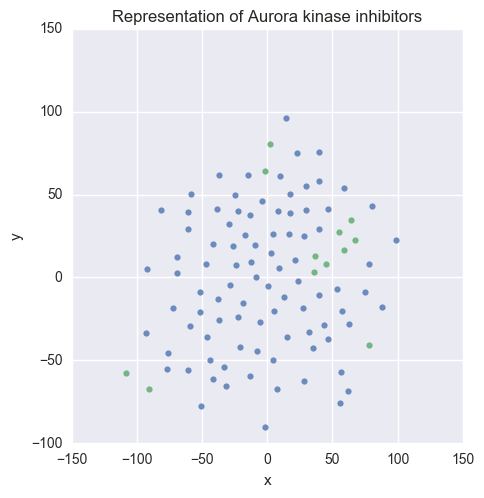

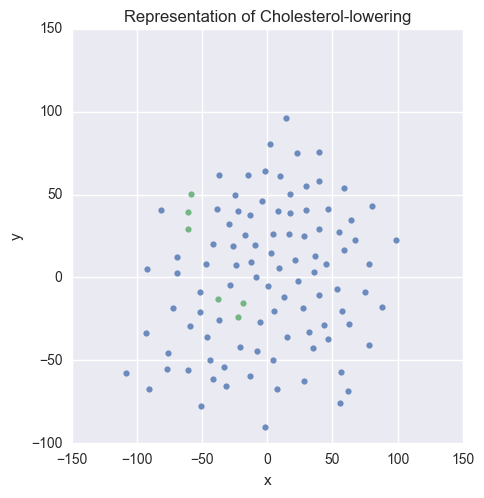

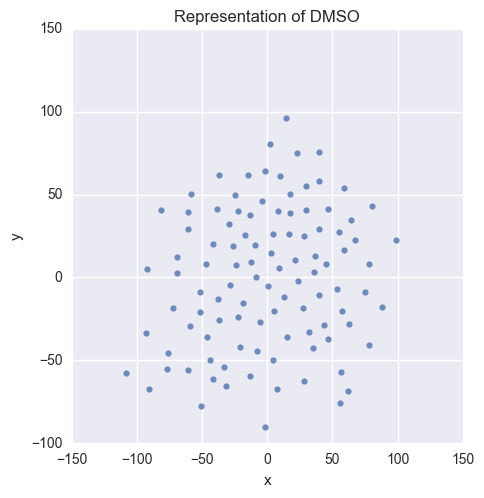

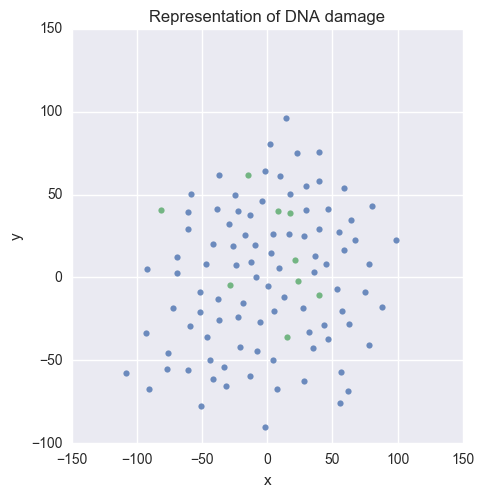

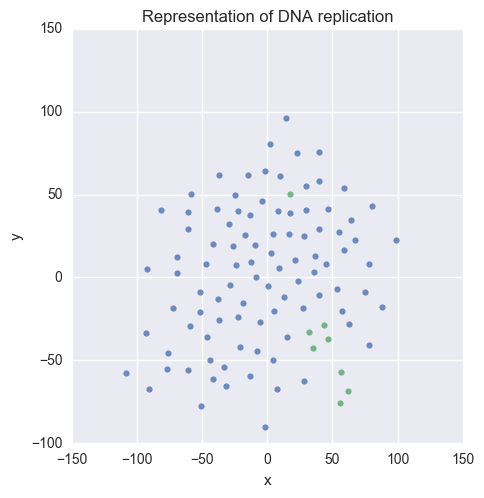

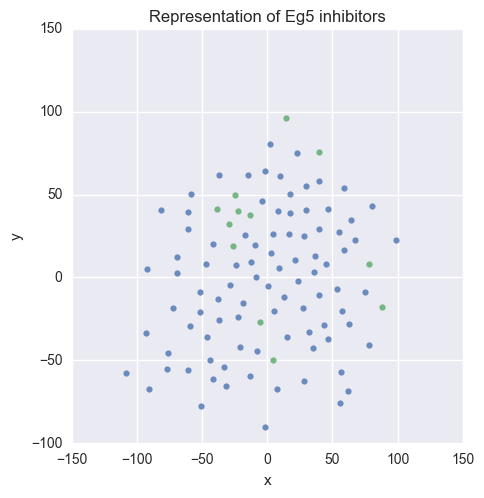

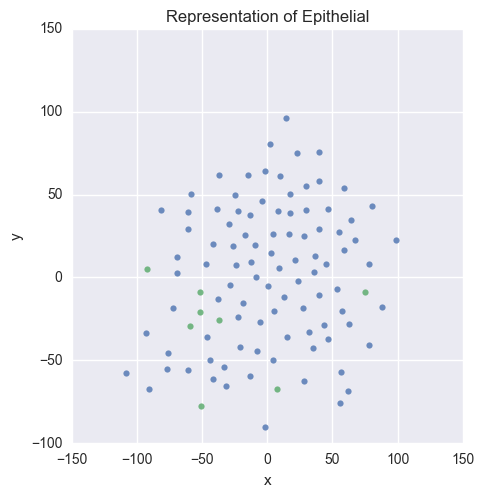

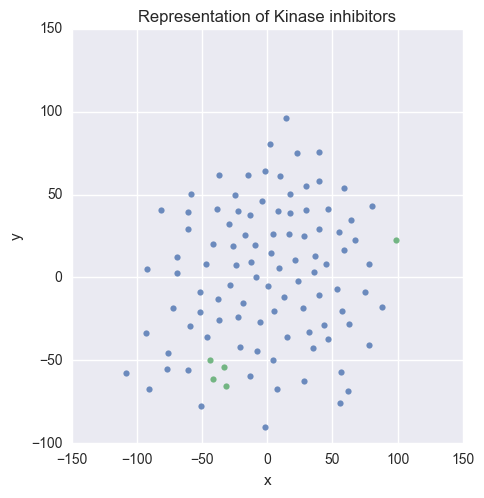

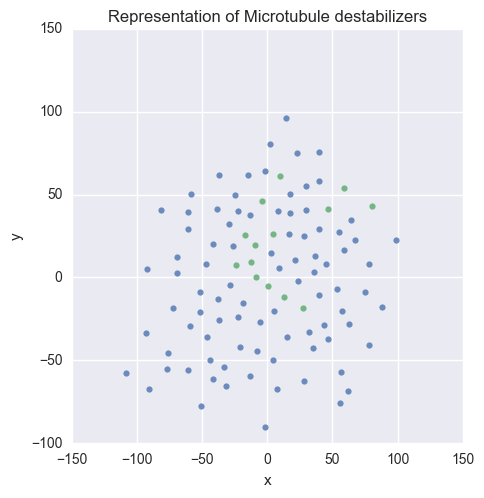

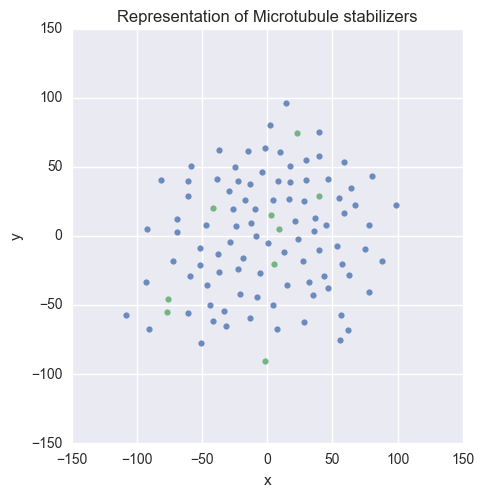

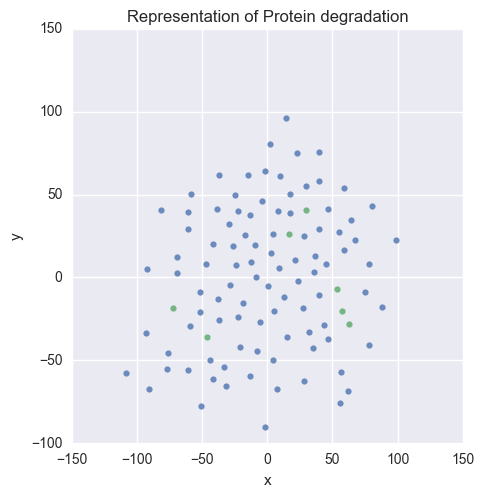

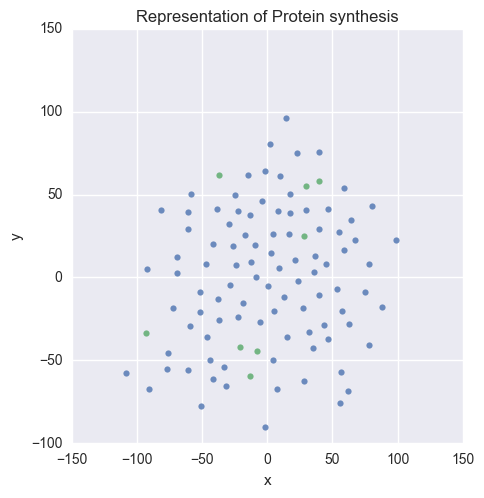

In [9]:
for moa in unique_moas:
    tsne_reps['hue'] = 0
    tsne_reps.loc[tsne_reps['moa'] == moa, 'hue'] = 1
    sns.lmplot(x="x", y="y", hue="hue", data=tsne_reps,
               fit_reg=False, legend=False)
    plt.title('Representation of %s' % moa)
    plt.show()

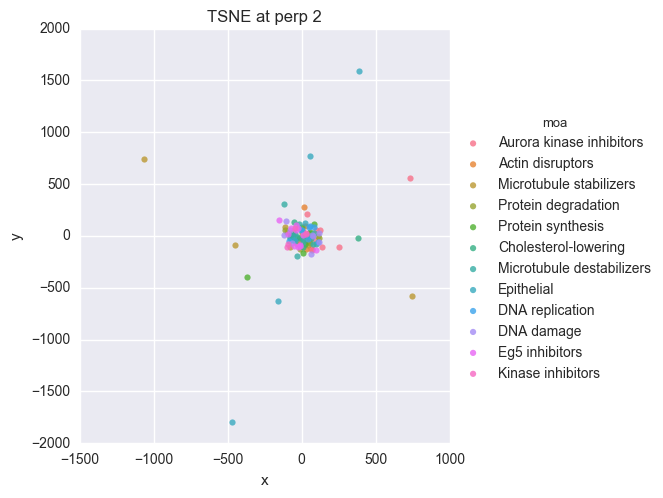

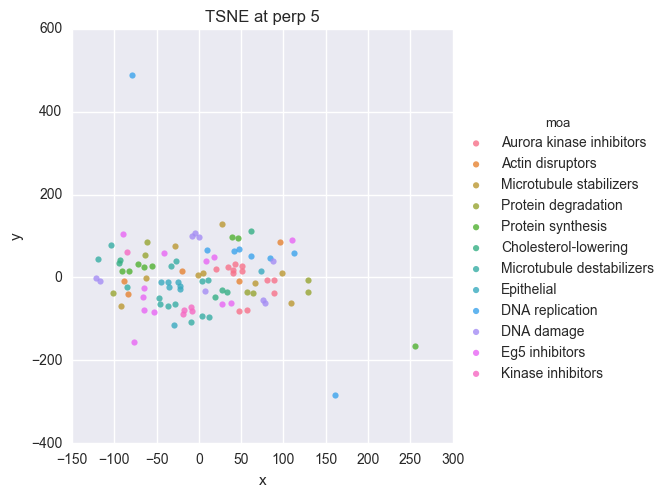

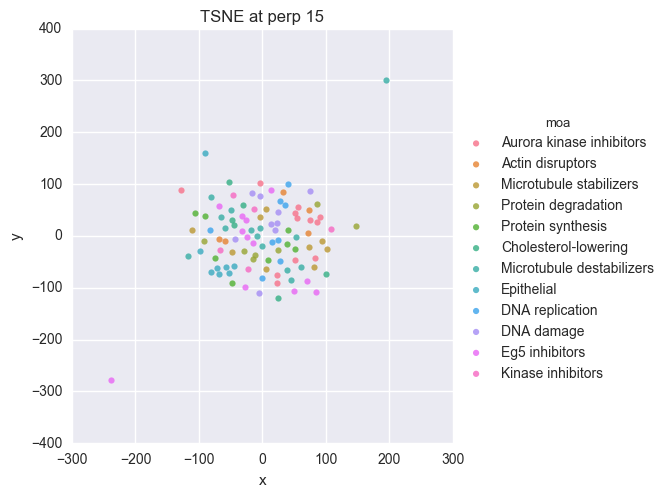

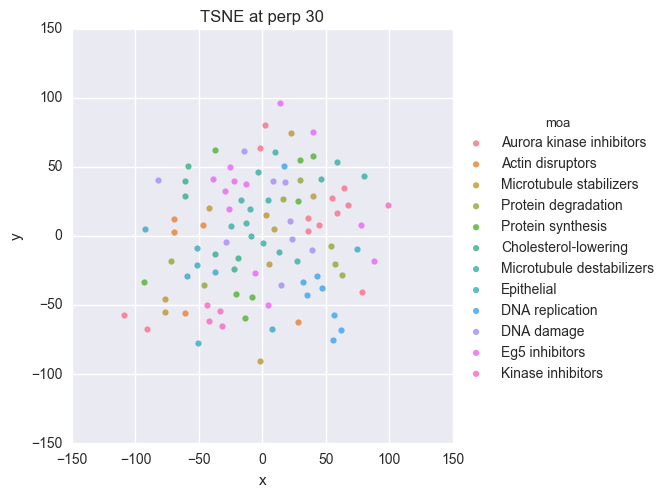

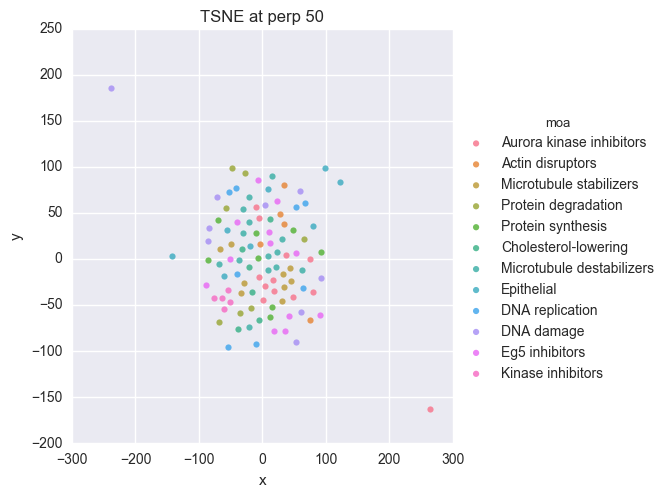

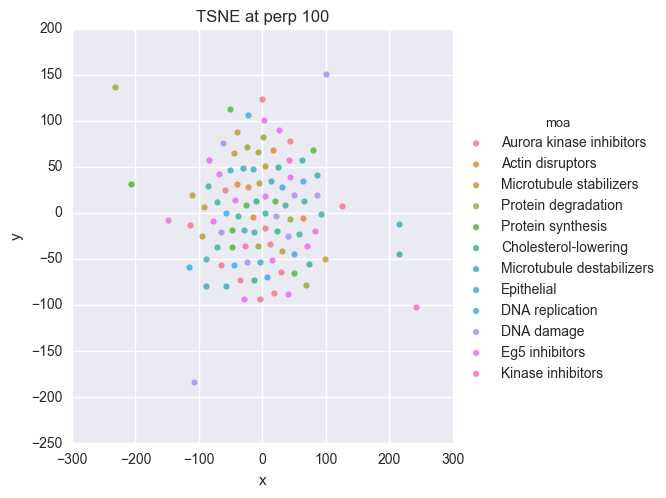

In [10]:
for perp in [2, 5, 15, 30, 50, 100]:
    model = TSNE(n_components=2, random_state=0, perplexity=perp)
    reps = model.fit_transform(combined.iloc[:, 3:-3])
    tsne_reps = pd.DataFrame(columns=['moa', 'x', 'y'])
    tsne_reps['moa'] = combined['moa']
    tsne_reps[['x', 'y']] = reps
    sns.lmplot(x="x", y="y", hue="moa", data=tsne_reps,
           fit_reg=False, legend_out=True, legend=True)
    plt.title('TSNE at perp %d' % perp)
    plt.show()

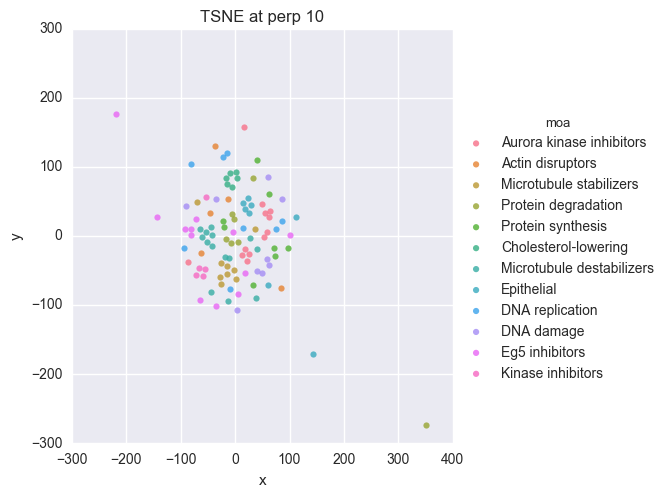

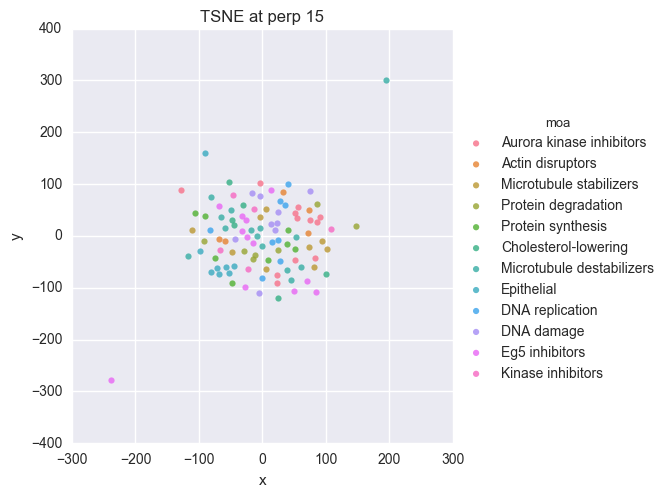

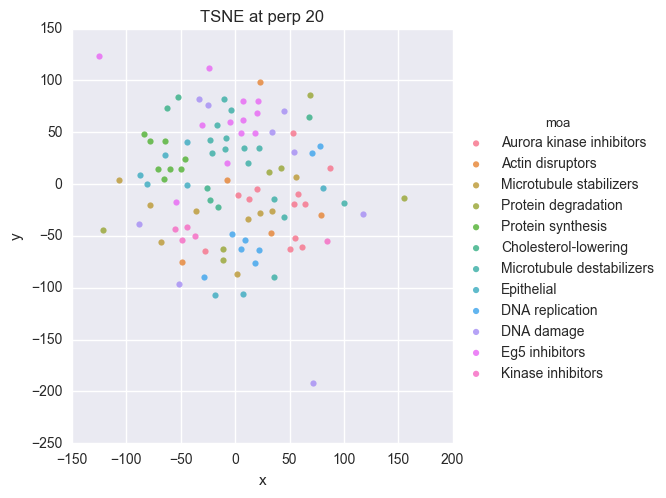

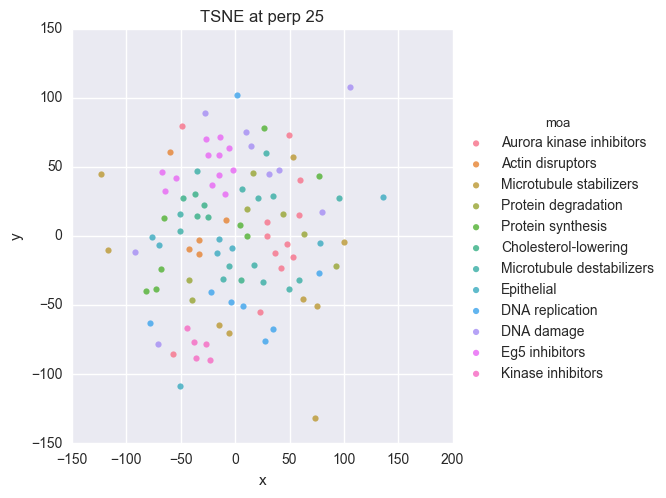

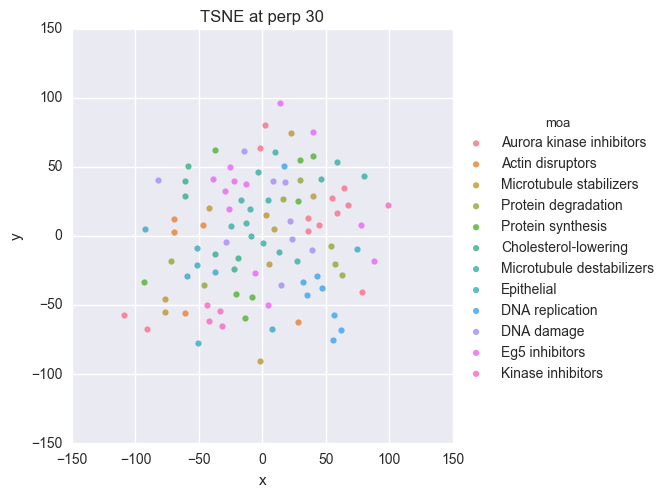

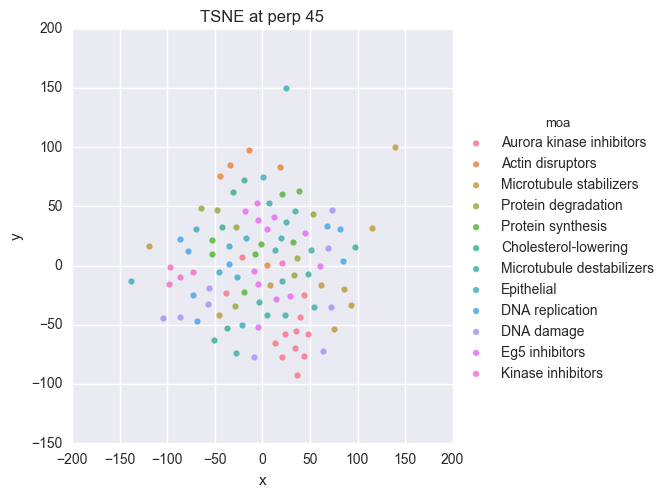

In [11]:
for perp in [10, 15, 20, 25, 30, 45]:
    model = TSNE(n_components=2, random_state=0, perplexity=perp)
    reps = model.fit_transform(combined.iloc[:, 3:-3])
    tsne_reps = pd.DataFrame(columns=['moa', 'x', 'y'])
    tsne_reps['moa'] = combined['moa']
    tsne_reps[['x', 'y']] = reps
    sns.lmplot(x="x", y="y", hue="moa", data=tsne_reps,
           fit_reg=False, legend_out=True, legend=True)
    plt.title('TSNE at perp %d' % perp)
    plt.show()